## Problem Set #[4]
MACS 30150, Dr. Evans

Linghui Wu

### Question 1 

#### (a)

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.stats as sts
import scipy.optimize as opt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the income data as Numpy array
income = np.loadtxt("data/incomes.txt")
income

array([ 51253.49715631, 100630.32024137,  83009.27613739,  82882.10654304,
        77338.29483892,  81071.64131675,  84760.04353269,  74599.0967193 ,
        94687.36110452,  76720.48678222,  84669.65776296,  79707.04914362,
       100026.64050846,  89828.42639587,  74006.05604302, 103281.1855776 ,
        88586.79236711, 133631.92813961,  91519.53047238, 106863.33198279,
        89622.32208316,  63803.24097245,  99116.670934  , 135865.02679613,
        61344.18577082,  99182.27630779,  55038.04861413,  71353.56078829,
        90880.19896459,  80950.37075039,  84724.93806271,  91236.88284731,
        91628.21297882, 105243.4671147 ,  71500.93550933,  56162.05440841,
        78935.2939267 ,  81097.09361259, 130354.71406191, 112159.02216504,
        82259.96409801,  75699.52604273,  71699.30209176,  93487.89133203,
       120723.60773086, 113045.98795795,  70752.04409433, 103679.41128338,
        62517.62724779,  70780.7133676 , 112840.45723451,  65532.50301185,
        69456.26059752,  

(45000, 140000)

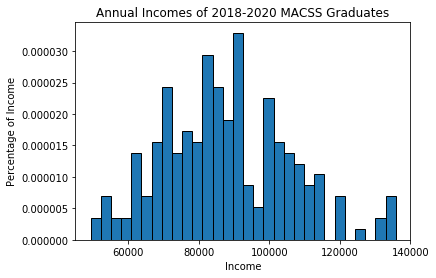

In [3]:
# Plot the histogram
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, density=True, edgecolor="k")
plt.title("Annual Incomes of 2018-2020 MACSS Graduates")
plt.xlabel(r"Income")
plt.ylabel(r"Percentage of Income")
plt.xlim([45000, 140000])

#### (b)

In [4]:
# Define a truncated lognormal function that generates value of a lognormal pdf
def trunc_lognormal_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    if cut_ub == "None" and cut_lb == "None":
        prob_notcut = 1.0
    elif cut_ub == "None" and cut_lb != "None":
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu))
    elif cut_ub != "None" and cut_lb == "None":
        prob_notcut = sts.lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu))
    elif cut_ub != "None" and cut_lb != "None":
        prob_notcut = (sts.lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu)) -
                      sts.lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu)))
    
    pdf_vals = (1 / prob_notcut) * ((1 / (xvals * sigma * np.sqrt(2 * np.pi))) * 
                np.exp(- (np.log(xvals) - mu) ** 2 / (2 * sigma ** 2)))
    return pdf_vals

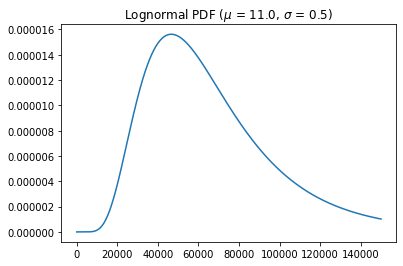

In [5]:
# Plot the lognormal PDF with the given params
dist_incomes = np.linspace(1e-10, 150000, 50000)
mu = 11.0
sigma = 0.5
plt.plot(dist_incomes, trunc_lognormal_pdf(dist_incomes, mu, sigma, 0, 150000))
plt.title("Lognormal PDF ($\mu$ = 11.0, $\sigma$ = 0.5)")
plt.show()

In [6]:
# Define the lognormal likelihood function for the lognormal distribution
def log_lik_trunc_lognormal(xvals, mu, sigma, cut_lb, cut_ub):
    pdf_vals = trunc_lognormal_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

In [7]:
# Calculate the value of the log likelihood for the given params
log_lik_trunc_lognormal(income, mu=11.0, sigma=0.5, cut_lb=0, cut_ub=150000)

-2379.120591931827

#### (c)

In [8]:
# Define the criterion function
def crit(params, *args):
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_trunc_lognormal(xvals, mu, abs(sigma), cut_lb, cut_ub)
    return -log_lik_val

In [9]:
# Calculate the ML estimates for mu, sigma & the value of the likelihood function
mu_init = 11.0
sigma_init = 0.5
params_init = np.array([mu_init, sigma_init])
mle_args = (income, 0, 150000)
results_uncstr = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sigma_MLE = results_uncstr.x
fuc_MLE = results_uncstr.fun
print("The ML estimates for mu is {}.".format(mu_MLE))
print("The ML estimates for sigma is {}.".format(sigma_MLE))
print("The value of the likelihood function is {}.".format(-fuc_MLE))

The ML estimates for mu is 11.361699972314367.
The ML estimates for sigma is 0.21174326151538592.
The value of the likelihood function is -2240.9343375116364.


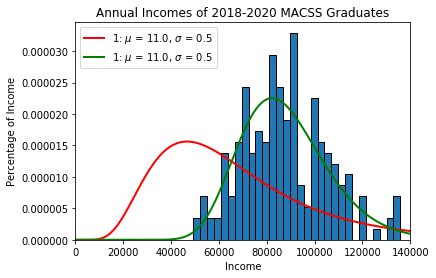

In [10]:
# Plot the histogram of the data
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, density=True, edgecolor="k")
plt.title("Annual Incomes of 2018-2020 MACSS Graduates")
plt.xlabel(r"Income")
plt.ylabel(r"Percentage of Income")
plt.xlim([0, 140000])

# Plot the test distribution from before
dist_incomes = np.linspace(1e-10, 150000, 50000)
plt.plot(dist_incomes, trunc_lognormal_pdf(dist_incomes, 11.0, 0.5, 0, 150000),
        linewidth=2, color="r", label="1: $\mu$ = 11.0, $\sigma$ = 0.5")

# Plot the MLE estimated distribution
plt.plot(dist_incomes, trunc_lognormal_pdf(dist_incomes, mu_MLE, sigma_MLE, 0, 150000),
        linewidth=2, color="g", label="1: $\mu$ = 11.0, $\sigma$ = 0.5")

plt.legend(loc='upper left')
plt.show()

In [11]:
# Calculate the variance-covariance matrix
print("The variance-covariance matrix is\n {}.".format(results_uncstr.hess_inv))

The variance-covariance matrix is
 [[0.00049802 0.00019204]
 [0.00019204 0.00015645]].


#### (d)

In [12]:
# Perform a likelihood ratio test
mu_new, sigma_new = np.array([11.0, 0.5])
log_lik_h0 = log_lik_trunc_lognormal(income, mu_new, sigma_new, 0, 150000)
print("The hypothesis log likelihood value is {}.".format(log_lik_h0))
log_lik_mle = log_lik_trunc_lognormal(income, mu_MLE, sigma_MLE, 0, 150000)
print("The MLE log likelihood value is {}.".format(log_lik_mle))
LR_val = 2 * (log_lik_mle - log_lik_h0)
print("The likelihood ratio value is {}.".format(LR_val))
pval_h0 = 1.0 -sts.chi2.cdf(LR_val, 2)
print("The chi squared of H0 with 2 degrees of freedom p-value is {}.".format(pval_h0))

The hypothesis log likelihood value is -2379.120591931827.
The MLE log likelihood value is -2240.9343375116364.
The likelihood ratio value is 276.37250884038167.
The chi squared of H0 with 2 degrees of freedom p-value is 0.0.


**Since the p-value is 0.0, we can reject the $H_{0}$ at any level of significance and conclude that the data in `income.txt` is very unlikely from the distribution in part(b).**

#### (e)

In [13]:
# The probability of earning more than $100,000
prob1 = 1 - ((sts.lognorm.cdf(100000, s=sigma_MLE, scale=np.exp(mu_MLE)))
        / sts.lognorm.cdf(150000, s=sigma_MLE, scale=np.exp(mu_MLE)))
print("The probability of earning more than $100,000 is {}%.".format(prob1 * 100))

The probability of earning more than $100,000 is 23.427612310712597%.


In [14]:
# The probability of earning less than $75,000
prob2 = (sts.lognorm.cdf(75000, s=sigma_MLE, scale=np.exp(mu_MLE))
        / sts.lognorm.cdf(150000, s=sigma_MLE, scale=np.exp(mu_MLE)))
print("The probability of earning less than $75,000 is {}%.".format(prob2 * 100))

The probability of earning less than $75,000 is 26.076018024405435%.


### Question 2

#### (a)

In [15]:
# Load the Sick data as dataframe
sick_df = pd.read_csv("data/sick.txt")
sick_df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [16]:
# Define the normal PDF function
def norm_pdf(xvals, mu, sigma):
    pdf_vals = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- 1/2 * ((xvals - mu) / sigma) ** 2)
    return pdf_vals

In [17]:
# Define the likelihood function
def liklihood_value(sick, b0, b1, age, b2, children, b3, temp, sigma):
    xvals = sick - b0 - b1 * age - b2 * children - b3 * temp
    pdf_vals = norm_pdf(xvals, 0, sigma)
    log_pdf_vals = np.log(pdf_vals)
    log_lik_val = log_pdf_vals.sum()
    return log_lik_val

In [18]:
# Define the criterion function
def crit2(params, *args):
    b0, b1, b2, b3, sigma = params
    sick, age, children, temp = args
    log_lik_val = liklihood_value(sick, b0, b1, age, b2, children, b3, temp, sigma)
    return -log_lik_val

In [19]:
# Calculate the ML estimates for b0, b1, b2, b4, sigma & the value of the likelihood funcion
b0_init = 0.2
b1_init = 0
b2_init = 0
b3_init = 0
sigma_init = 1
params_init2 = np.array([b0_init, b1_init, b2_init, b3_init, sigma_init])
mle_args2 = (sick_df["sick"], sick_df["age"], sick_df["children"], sick_df["avgtemp_winter"])
results_uncstr = opt.minimize(crit2, params_init2, args =(mle_args2))
b0_MLE, b1_MLE, b2_MLE, b3_MLE, sigma_MLE = results_uncstr.x
print("The MLE for b0 is {}.".format(b0_MLE))
print("The MLE for b1 is {}.".format(b1_MLE))
print("The MLE for b2 is {}.".format(b2_MLE))
print("The MLE for b3 is {}.".format(b3_MLE))
print("The MLE for sigma is {}.".format(sigma_MLE))
fuc_MLE = results_uncstr.fun
print("The value of the likelihood function is {}.".format(-fuc_MLE))
print("The variance-covariance matrix is\n {}.".format(results_uncstr.hess_inv))

The MLE for b0 is 0.251645215259351.
The MLE for b1 is 0.012933332160385416.
The MLE for b2 is 0.40050255002868984.
The MLE for b3 is -0.009991647840467943.
The MLE for sigma is 0.0030177452918214993.
The value of the likelihood function is 876.8650481652498.
The variance-covariance matrix is
 [[ 9.23748923e-07  9.17332430e-09 -1.79738120e-07 -2.15806525e-08
  -1.43683329e-09]
 [ 9.17332430e-09  3.55943279e-09 -3.23649058e-08 -2.27160213e-09
   1.01609872e-09]
 [-1.79738120e-07 -3.23649058e-08  3.42231032e-07  2.10075774e-08
  -8.57585633e-09]
 [-2.15806525e-08 -2.27160213e-09  2.10075774e-08  1.79341938e-09
  -5.63464013e-10]
 [-1.43683329e-09  1.01609872e-09 -8.57585633e-09 -5.63464013e-10
   2.18659764e-08]].


In [20]:
results_uncstr

      fun: -876.8650481652498
 hess_inv: array([[ 9.23748923e-07,  9.17332430e-09, -1.79738120e-07,
        -2.15806525e-08, -1.43683329e-09],
       [ 9.17332430e-09,  3.55943279e-09, -3.23649058e-08,
        -2.27160213e-09,  1.01609872e-09],
       [-1.79738120e-07, -3.23649058e-08,  3.42231032e-07,
         2.10075774e-08, -8.57585633e-09],
       [-2.15806525e-08, -2.27160213e-09,  2.10075774e-08,
         1.79341938e-09, -5.63464013e-10],
       [-1.43683329e-09,  1.01609872e-09, -8.57585633e-09,
        -5.63464013e-10,  2.18659764e-08]])
      jac: array([  1.1867981 , 125.22184753,   8.79782104,  84.72367859,
         2.77348328])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 968
      nit: 42
     njev: 136
   status: 2
  success: False
        x: array([ 0.25164522,  0.01293333,  0.40050255, -0.00999165,  0.00301775])

#### (b)

In [21]:
# Perform a likelihood ratio test
b0_test = 1.0
b1_test, b2_test, b3_test = 0, 0, 0
sigma_test = np.sqrt(0.01)

log_lik_h0 = liklihood_value(sick_df["sick"], b0_test, b1_test, sick_df["age"], \
                             b2_test, sick_df["children"], b3_test, sick_df["avgtemp_winter"], sigma_test)
print("The hypothesis log likelihood value is {}.".format(log_lik_h0))
log_lik_MLE = liklihood_value(sick_df["sick"], b0_MLE, b1_MLE, sick_df["age"], \
                             b2_MLE, sick_df["children"], b3_MLE, sick_df["avgtemp_winter"], sigma_MLE)
print("The MLE log likelihood value is {}.".format(log_lik_MLE))
LR_val = 2 * (log_lik_MLE - log_lik_h0)
print("The likelihood ratio value is {}.".format(LR_val))
pval_h0 = 1.0 -sts.chi2.cdf(LR_val, 2)
print("The chi squared of H0 with 2 degrees of freedom p-value is {}.".format(pval_h0))

The hypothesis log likelihood value is -2253.700688042125.
The MLE log likelihood value is 876.8650481652498.
The likelihood ratio value is 6261.13147241475.
The chi squared of H0 with 2 degrees of freedom p-value is 0.0.


**Since the p-value is 0.0, we can reject the $H_{0}$ at any level of significance and conclude that it is very unlikely that age, number of children, and average winter temperature have no effect on the number of sick days.**